In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier

import time

## Support Vector Machine
 - DB2 | Test on Rep 2 and 5
 - DB3 | Test on Rep 2 and 5
 - Combi (5and5) | Test on Rep 2 and 5
 - Train on DB2 Rep 1,3,4,6 test on DB3 Rep 2 and 5

In [26]:
# Function to split into training and testing datasets
def traintest(orig_df, subject):
    if subject != None:
        orig_df = orig_df[orig_df['Subject'] == subject]
    
    train_df = orig_df[orig_df.Repetition.isin([1,3,4,6])]
    train_df = train_df.drop(['Repetition', 'Subject'], axis=1)
    test_df = orig_df[orig_df.Repetition.isin([2, 5])]
    test_df = test_df.drop(['Repetition', 'Subject'], axis=1)
    return (train_df, test_df)

# Function to train a specified model with a specified feature, 
# neighbours arg set to 0 for when not using k-nn
def TrainModels(dataset, feature, model, subjects, neighbours = 0):
    exercise_test_df = pd.DataFrame()
    testNum = 0
    accuracies = []
    
    # Dataset 4 is the placeholder int to denote combining (or pairing individuals in) both datasets
    if dataset == 4:
        # Set dataset variable as 2 to load csv later then load dataset 3 csv
        dataset = 2
        exercise_3_df = pd.read_csv('dataset/DB3_E1_' + feature + '.csv', index_col=0)
        subjects2 = [2, 6, 8, 10, 12, 13, 16, 21, 23, 26, 31]
        testNum = 3
    
    # Load the specified dataset (note: this is where dataset = 2 comes in if using both sets)
    exercise_df = pd.read_csv('dataset/DB' + str(dataset) + '_E1_' + feature + '.csv', index_col=0)
    
    for subject in subjects:
        # Split dataset into training and test if only using a single dataset
        if testNum != 3: (train_df, test_df) = traintest(exercise_df, subject)
        # Else split both datasets, then combine to make a single train and test (respective to test num)
        else:
            if subject != None:
                (train_df, test_df) = traintest(exercise_df, subjects2[(subject-1)])
            else:
                (train_df, test_df) = traintest(exercise_df, subject)
            (train_3_df, test_3_df) = traintest(exercise_3_df, subject)
            train_df = train_df.append(train_3_df, ignore_index=True)
            test_df = test_df.append(test_3_df, ignore_index=True)
        
        # Get target and features columns for feeding into models
        target = train_df['Movement']
        features = train_df.drop(['Movement'], axis=1)
        test_target = test_df['Movement']
        test_features = test_df.drop(['Movement'], axis=1)
        
        start_time = time.time()
        
        # If the model chosen is SVM (Support Vector Machine) then run that
        if model.lower() == 'svm':
            svm_model = svm.SVC(gamma='auto',kernel='rbf')
            svm_model.fit(features, target)
            duration = (time.time() - start_time)/60
            
            print("  Finished training model in " + str(duration) + ' minutes.')

            start_time = time.time()
            pred = svm_model.predict(test_features)
            acc = accuracy_score(test_target, pred)
        
        # If the model chosen is LDA (Linear Discreminant Analysis) then run that    
        elif model.lower() == 'lda':
            lda_model = LinearDiscriminantAnalysis(solver='lsqr')
            lda_model.fit(features, target)
            duration = (time.time() - start_time)/60
            
            print("  Finished training model in " + str(duration) + ' minutes.')
            
            start_time = time.time()
            pred = lda_model.predict(test_features)
            acc = accuracy_score(test_target, pred)
        
        # If the model chosen is k-NN (k-Nearest Neighbour) then run that    
        elif model.lower() == 'knn':
            knn_model = KNeighborsClassifier(n_neighbors=neighbours)
            knn_model.fit(features, target)
            duration = (time.time() - start_time)/60

            print("  Finished training model in " + str(duration) + ' minutes.')

            start_time = time.time()
            pred = knn_model.predict(test_features)
            acc = accuracy_score(test_target, pred)
        
        # Catch any misprinted model names
        else: print("Model '" + model + "' not recognised.")
            
        duration = (time.time() - start_time)/60
        accuracies.append(acc)
        print(' Accuracy ' + str(acc) + '\nTested in ' + str(duration) + ' minutes')
    
    # Find the average accuracy
    avgAcc = sum(accuracies)/len(subjects)
    print("\nAccuracy " + str(avgAcc) +'\n')
    return(avgAcc)

## Support Vector Machine

### TEST 1 | DB2 Only

note: 8 and 11 appear to bring down avg classification
perhaps try training on whole dataset excl. those?

In [134]:
# Create empty accuracies list
test1Accs = []
features = ['RMS', 'MAV', 'WL']
subjects = [2, 6, 8, 10, 12, 13, 16, 21, 23, 26, 31]

# Train model for each feature on individual subjects
for feature in features:
    #accs = svmTrain(2, feature)
    accs = TrainModels(2, feature, 'svm', subjects)
    test1Accs.append(accs)
    
print(test1Accs)

  Finished training model in 0.12605016231536864 minutes.
 Accuracy 0.7671840354767184
Tested in 0.16404451926549277 minutes
  Finished training model in 0.20129473606745402 minutes.
 Accuracy 0.7010183821174663
Tested in 0.21552006006240845 minutes
  Finished training model in 0.09066005945205688 minutes.
 Accuracy 0.7899939826356056
Tested in 0.10653642018636068 minutes
  Finished training model in 0.06845940351486206 minutes.
 Accuracy 0.7782162588792423
Tested in 0.1094046394030253 minutes
  Finished training model in 0.19003297487894694 minutes.
 Accuracy 0.7445225581871545
Tested in 0.22209405899047852 minutes
  Finished training model in 0.09144304990768433 minutes.
 Accuracy 0.7272727272727273
Tested in 0.1113509734471639 minutes
  Finished training model in 0.08547901312510173 minutes.
 Accuracy 0.7128030361707072
Tested in 0.12324864069620768 minutes
  Finished training model in 0.15238284667332966 minutes.
 Accuracy 0.6238938053097345
Tested in 0.15986295541127524 minutes
  

In [3]:
# Create empty accuracies list
test1WholeAccs = []
features = ['RMS', 'MAV', 'WL']

# Train model for each feature on the whole dataset
for feature in features:
    #accs = svmTrain(2, feature)
    accs = TrainModels(2, feature, 'svm', [None])
    test1WholeAccs.append(accs)
    
print(test1WholeAccs)

  Finished training model in 105.02554508447648 minutes.
 Accuracy 0.17005448709974375
Tested in 38.37775477568309 minutes

Accuracy 0.17005448709974375

[0.56, 0.51, 0.17005448709974375]


### TEST 2 | DB3 Only

In [3]:
# Create empty accuracies list
test2Accs = []
features = ['RMS', 'MAV', 'WL']
subjects = np.arange(1,12)

# Train model for each feature on individual subjects
for feature in features:
    #accs = svmTrain(3, feature)
    accs = TrainModels(3, feature, 'svm', subjects)
    test2Accs.append(accs)
    
print(test2Accs)

  Finished training model in 0.4203981359799703 minutes.
 Accuracy 0.5453984979262414
Tested in 0.33295334577560426 minutes
  Finished training model in 0.1365731676419576 minutes.
 Accuracy 0.6514363266229359
Tested in 0.181786580880483 minutes
  Finished training model in 0.22361814181009929 minutes.
 Accuracy 0.4248496993987976
Tested in 0.16687650680541993 minutes
  Finished training model in 0.7221948067347209 minutes.
 Accuracy 0.4628224582701062
Tested in 0.5503128131230672 minutes
  Finished training model in 0.2881016214688619 minutes.
 Accuracy 0.46743277193635435
Tested in 0.39277116060256956 minutes
  Finished training model in 0.10343776941299439 minutes.
 Accuracy 0.5708191126279863
Tested in 0.11331677834192912 minutes
  Finished training model in 0.2719635248184204 minutes.
 Accuracy 0.22231702692453545
Tested in 0.14208741982777914 minutes
  Finished training model in 0.1587966998418172 minutes.
 Accuracy 0.5833131801692866
Tested in 0.15927985906600953 minutes
  Finis

In [4]:
# Create empty accuracies list
test2WholeAccs = []
features = ['RMS', 'MAV', 'WL']

# Train model for each feature on the whole dataset
for feature in features:
    #accs = svmTrain(3, feature)
    accs = TrainModels(3, feature, 'svm', [None])
    test2WholeAccs.append(accs)
    
print(test2WholeAccs)

  Finished training model in 58.559037566185 minutes.
 Accuracy 0.3929776858282843
Tested in 36.53608888785045 minutes

Accuracy 0.3929776858282843

  Finished training model in 68.50672220389048 minutes.
 Accuracy 0.34595537165656864
Tested in 38.173284359773 minutes

Accuracy 0.34595537165656864

  Finished training model in 118.06534122228622 minutes.
 Accuracy 0.11306055884617483
Tested in 39.761601360638934 minutes

Accuracy 0.11306055884617483

[0.3929776858282843, 0.34595537165656864, 0.11306055884617483]


### TEST 3 | Combine (Or Pair Individuals In) DB2 and DB3

In [4]:
# Create empty accuracies list
test3Accs = []
features = ['RMS', 'MAV', 'WL']
subjects = np.arange(1,12)

# Train model for each feature on individual subjects
for feature in features:
    #accs = svmTrain(4, feature)
    accs = TrainModels(4, feature, 'svm', subjects)
    test3Accs.append(accs)
    
print(test3Accs)

  Finished training model in 1.1564072648684183 minutes.
 Accuracy 0.6144574580157403
Tested in 1.0003426909446715 minutes
  Finished training model in 0.8097099741299947 minutes.
 Accuracy 0.6447222607009281
Tested in 0.795499591032664 minutes
  Finished training model in 0.7582992831865947 minutes.
 Accuracy 0.5765036780614453
Tested in 0.5526464541753133 minutes
  Finished training model in 1.4376167098681132 minutes.
 Accuracy 0.5539704215939797
Tested in 1.188399855295817 minutes
  Finished training model in 1.2783535718917847 minutes.
 Accuracy 0.5487895974546964
Tested in 1.2600116332372029 minutes
  Finished training model in 0.52461891969045 minutes.
 Accuracy 0.6005087922877801
Tested in 0.4895676851272583 minutes
  Finished training model in 0.8286516269048055 minutes.
 Accuracy 0.4747857964960143
Tested in 0.5429108540217081 minutes
  Finished training model in 0.7063388506571452 minutes.
 Accuracy 0.5622623760435856
Tested in 0.6471550107002259 minutes
  Finished training 

In [22]:
# Create empty accuracies list
test3WholeAccs = []
features = ['RMS', 'MAV', 'WL']

# Train model for each feature on the whole dataset
for feature in features:
    #accs = svmTrain(4, feature)
    accs = TrainModels(4, feature, 'svm', [None])
    test3WholeAccs.append(accs)
    
print(test3WholeAccs)

  Finished training model in 282.1030213991801 minutes.
 Accuracy 0.3764725849909228
Tested in 145.50370440880457 minutes

Accuracy 0.3764725849909228

  Finished training model in 525.930447089672 minutes.
 Accuracy 0.1306187235009318
Tested in 163.33592352469762 minutes

Accuracy 0.1306187235009318

[0.42775051750735726, 0.3764725849909228, 0.1306187235009318]


## Linear Discriminant Analysis
### TEST 1 | DB2 Only

In [5]:
# Create empty accuracies list
test1AccsLDA = []
features = ['RMS', 'MAV', 'WL']
subjects = [2, 6, 8, 10, 12, 13, 16, 21, 23, 26, 31]

# Train model for each feature on individual subjects
for feature in features:
    #accs = ldaTrain(2, feature)
    accs = TrainModels(2, feature, 'lda', subjects)
    test1AccsLDA.append(accs)
    
print(test1AccsLDA)

  Finished training model in 0.0010995030403137206 minutes.
 Accuracy 0.5769817073170732
Tested in 0.00013327598571777344 minutes
  Finished training model in 0.0007663249969482421 minutes.
 Accuracy 0.4612822647793505
Tested in 9.995301564534506e-05 minutes
  Finished training model in 0.0006163914998372396 minutes.
 Accuracy 0.5003868305682111
Tested in 6.663799285888672e-05 minutes
  Finished training model in 0.0006996909777323405 minutes.
 Accuracy 0.6287292817679558
Tested in 6.662607192993164e-05 minutes
  Finished training model in 0.0007829825083414713 minutes.
 Accuracy 0.5374377175619411
Tested in 8.329947789510091e-05 minutes
  Finished training model in 0.0006163914998372396 minutes.
 Accuracy 0.5028672626075223
Tested in 8.329550425211589e-05 minutes
  Finished training model in 0.0005830685297648112 minutes.
 Accuracy 0.5567345674231275
Tested in 9.995698928833008e-05 minutes
  Finished training model in 0.0006663719813028971 minutes.
 Accuracy 0.38831248092767773
Tested

In [ ]:
# Create empty accuracies list
test1WholeAccsLDA = []
features = ['RMS', 'MAV', 'WL']

# Train model for each feature on whole dataset
for feature in features:
    #accs = svmTrain(2, feature)
    accs = TrainModels(2, feature, 'lda', [None])
    test1WholeAccsLDA.append(accs)
    
print(test1WholeAccsLDA)

### TEST 2 | DB3 Only

In [6]:
# Create empty accuracies list
test2AccsLDA = []
features = ['RMS', 'MAV', 'WL']
subjects = np.arange(1,12)

# Train model for each feature on individual subjects
for feature in features:
    #accs = ldaTrain(3, feature)
    accs = TrainModels(3, feature, 'lda', subjects)
    test2AccsLDA.append(accs)
    
print(test2AccsLDA)

  Finished training model in 0.0008329669634501139 minutes.
 Accuracy 0.3778724358255801
Tested in 0.00011661847432454427 minutes
  Finished training model in 0.000832974910736084 minutes.
 Accuracy 0.5075020734373822
Tested in 0.0002332290013631185 minutes
  Finished training model in 0.0005997260411580404 minutes.
 Accuracy 0.2884900235253115
Tested in 6.66340192159017e-05 minutes
  Finished training model in 0.001116172472635905 minutes.
 Accuracy 0.27125580539844574
Tested in 0.00013327201207478842 minutes
  Finished training model in 0.0009662389755249023 minutes.
 Accuracy 0.3358146459477063
Tested in 0.00013327201207478842 minutes
  Finished training model in 0.0004997730255126953 minutes.
 Accuracy 0.5146947288585514
Tested in 6.66340192159017e-05 minutes
  Finished training model in 0.0007663249969482421 minutes.
 Accuracy 0.21511186954872963
Tested in 0.0002498785654703776 minutes
  Finished training model in 0.0006330450375874837 minutes.
 Accuracy 0.4062877871825877
Tested 

In [13]:
# Create empty accuracies list
test2WholeAccsLDA = []
features = ['RMS', 'MAV', 'WL']

# Train model for each feature on whole set
for feature in features:
    #accs = svmTrain(3, feature)
    accs = TrainModels(3, feature, 'lda', [None])
    test2WholeAccsLDA.append(accs)
    
print(test2WholeAccsLDA)

  Finished training model in 0.008579524358113606 minutes.
 Accuracy 0.17475395300724103
Tested in 0.0009995500246683757 minutes

Accuracy 0.17475395300724103

  Finished training model in 0.009579094250996907 minutes.
 Accuracy 0.1749135510565982
Tested in 0.0010661999384562173 minutes

Accuracy 0.1749135510565982

  Finished training model in 0.008646190166473389 minutes.
 Accuracy 0.10220858821318363
Tested in 0.001865832010904948 minutes

Accuracy 0.10220858821318363

[0.17475395300724103, 0.1749135510565982, 0.10220858821318363]


### TEST 3 | Combine (Or Pair Individuals In) DB2 and DB3

In [7]:
# Create empty accuracies list
test3AccsLDA = []
features = ['RMS', 'MAV', 'WL']
subjects = np.arange(1,12)

# Train model for each feature on individual subjects
for feature in features:
    #accs = svmTrain(4, feature)
    accs = TrainModels(4, feature, 'lda', subjects)
    test3AccsLDA.append(accs)
    
print(test3AccsLDA)

  Finished training model in 0.0014660358428955078 minutes.
 Accuracy 0.3733345727210758
Tested in 0.0001832405726114909 minutes
  Finished training model in 0.0013660669326782226 minutes.
 Accuracy 0.34322620861615183
Tested in 0.00014992554982503256 minutes
  Finished training model in 0.0015326579411824544 minutes.
 Accuracy 0.30778883600173085
Tested in 0.00011662642161051433 minutes
  Finished training model in 0.001599287986755371 minutes.
 Accuracy 0.32388064038120695
Tested in 0.00023322105407714845 minutes
  Finished training model in 0.001682587464650472 minutes.
 Accuracy 0.3018121455249689
Tested in 0.00021657546361287435 minutes
  Finished training model in 0.001116180419921875 minutes.
 Accuracy 0.32281531732571633
Tested in 0.00023321310679117838 minutes
  Finished training model in 0.0010995149612426757 minutes.
 Accuracy 0.34140415192463447
Tested in 0.00021656354268391928 minutes
  Finished training model in 0.0011994679768880208 minutes.
 Accuracy 0.3360247716850233


In [3]:
# Create empty accuracies list
test3WholeAccsLDA = []
features = ['RMS', 'MAV', 'WL']

# Train model for each feature on whole set
for feature in features:
    #accs = svmTrain(4, feature)
    accs = TrainModels(4, feature, 'lda', [None])
    test3WholeAccsLDA.append(accs)
    
print(test3WholeAccsLDA)

  Finished training model in 0.017259069283803306 minutes.
 Accuracy 0.20175967655411323
Tested in 0.0019158323605855305 minutes

Accuracy 0.20175967655411323

  Finished training model in 0.017242379983266196 minutes.
 Accuracy 0.1964012401991835
Tested in 0.001949167251586914 minutes

Accuracy 0.1964012401991835

  Finished training model in 0.018308583895365396 minutes.
 Accuracy 0.11857152944716151
Tested in 0.0018825213114420573 minutes

Accuracy 0.11857152944716151

[0.20175967655411323, 0.1964012401991835, 0.11857152944716151]


## K-NN
### TEST 1 | DB2 Only

In [8]:
features = ['RMS', 'MAV', 'WL']
neighbours = [30, 40, 50]
subjects = [2, 6, 8, 10, 12, 13, 16, 21, 23, 26, 31]
# Create empty accuracies list
test1AccsKnn = []
# Train model for each feature on individual subjects
for i in range(0,3):
    #accs = knnTrain(2, features[i], neighbours[i])
    accs = TrainModels(2, features[i], 'knn', subjects, neighbours=neighbours[i])
    test1AccsKnn.append(accs)

print(test1AccsKnn)


  Finished training model in 0.00048310359319051106 minutes.
 Accuracy 0.7305986696230599
Tested in 0.040548797448476157 minutes
  Finished training model in 0.0007163365681966146 minutes.
 Accuracy 0.7147249087299046
Tested in 0.05004462003707886 minutes
  Finished training model in 0.0003998279571533203 minutes.
 Accuracy 0.7382446488438064
Tested in 0.035817547639211016 minutes
  Finished training model in 0.00041648546854654945 minutes.
 Accuracy 0.741594317284925
Tested in 0.025105599562327066 minutes
  Finished training model in 0.0006330529848734538 minutes.
 Accuracy 0.7175619411644256
Tested in 0.03351856867472331 minutes
  Finished training model in 0.00038315455118815103 minutes.
 Accuracy 0.7006240512734019
Tested in 0.025488773981730144 minutes
  Finished training model in 0.0005330999692281087 minutes.
 Accuracy 0.6733018356440245
Tested in 0.026038527488708496 minutes
  Finished training model in 0.0004498004913330078 minutes.
 Accuracy 0.6167226121452548
Tested in 0.032

In [16]:
features = ['RMS', 'MAV', 'WL']
neighbours = [30, 40, 50]
# Create empty accuracies list
test1WholeAccsKnn = []

#  Train model for each feature on whole set
for i in range(0,3):
    #accs = knnTrain(2, features[i], neighbours[i])
    accs = TrainModels(2, features[i], 'knn', [None], neighbours=neighbours[i])
    test1WholeAccsKnn.append(accs)

print(test1WholeAccsKnn)


  Finished training model in 0.009479137261708577 minutes.
 Accuracy 0.6537643370736198
Tested in 2.2060615460077924 minutes

Accuracy 0.6537643370736198

  Finished training model in 0.009229254722595216 minutes.
 Accuracy 0.660861344015127
Tested in 2.4326117277145385 minutes

Accuracy 0.660861344015127

  Finished training model in 0.015376524130503336 minutes.
 Accuracy 0.1537083571766228
Tested in 11.053014397621155 minutes

Accuracy 0.1537083571766228

[0.6537643370736198, 0.660861344015127, 0.1537083571766228]


### TEST 2 | DB3 Only

In [19]:
features = ['RMS', 'MAV', 'WL']
neighbours = [30, 40, 50]
subjects = np.arange(1,12)
# Create empty accuracies
test2AccsKnn = []
# Train model for each feature on individual subjects
for i in range(0,3):
    #accs = knnTrain(3, features[i], neighbours[i])
    accs = TrainModels(3, features[i], 'knn', subjects, neighbours=neighbours[i])
    test2AccsKnn.append(accs)

print(test2AccsKnn)


  Finished training model in 0.0005997339884440104 minutes.
 Accuracy 0.5174307813025446
Tested in 0.04534670114517212 minutes
  Finished training model in 0.0004164735476175944 minutes.
 Accuracy 0.614416044635452
Tested in 0.023139794667561848 minutes
  Finished training model in 0.000466458002726237 minutes.
 Accuracy 0.35950161191949115
Tested in 0.030053404966990153 minutes
  Finished training model in 0.0007163524627685547 minutes.
 Accuracy 0.41035545132661977
Tested in 0.06458820501963297 minutes
  Finished training model in 0.0008995811144510905 minutes.
 Accuracy 0.39359821345491763
Tested in 0.1591299017270406 minutes
  Finished training model in 0.0003165364265441895 minutes.
 Accuracy 0.5199089874857793
Tested in 0.026754875977834065 minutes
  Finished training model in 0.0003165125846862793 minutes.
 Accuracy 0.18799772468714449
Tested in 0.04198149840037028 minutes
  Finished training model in 0.0003998041152954102 minutes.
 Accuracy 0.5601773478436114
Tested in 0.027487

In [17]:
features = ['RMS', 'MAV', 'WL']
neighbours = [30, 40, 50]
# Create empty accuracies
test2WholeAccsKnn = []
# Train model for each feature on whole set
for i in range(0,3):
    #accs = knnTrain(3, features[i], neighbours[i])
    accs = TrainModels(3, features[i], 'knn',[None], neighbours=neighbours[i])
    test2WholeAccsKnn.append(accs)

print(test2WholeAccsKnn)


  Finished training model in 0.009245920181274413 minutes.
 Accuracy 0.4519698537017881
Tested in 2.309082837899526 minutes

Accuracy 0.4519698537017881

  Finished training model in 0.00962907075881958 minutes.
 Accuracy 0.4507462686567164
Tested in 2.576165171464284 minutes

Accuracy 0.4507462686567164

  Finished training model in 0.013177525997161866 minutes.
 Accuracy 0.10314222144082645
Tested in 11.877617784341176 minutes

Accuracy 0.10314222144082645

[0.4519698537017881, 0.4507462686567164, 0.10314222144082645]


### TEST 3 | Combine (Or Pair Individuals In) DB2 and DB3

In [10]:
features = ['RMS', 'MAV', 'WL']
neighbours = [30, 40, 50]
subjects = np.arange(1,12)
# Create empty accuracies
test3AccsKnn = []
# Train model for each feature on individual subjects
for i in range(0,3):
    #accs = knnTrain(4, features[i], neighbours[i])
    accs = TrainModels(4, features[i], 'knn', subjects, neighbours=neighbours[i])
    test3AccsKnn.append(accs)

print(test3AccsKnn)


  Finished training model in 0.001232775052388509 minutes.
 Accuracy 0.6096858152072876
Tested in 0.12277112007141114 minutes
  Finished training model in 0.0012327988942464193 minutes.
 Accuracy 0.6675093503255298
Tested in 0.10381743510564169 minutes
  Finished training model in 0.0009162545204162598 minutes.
 Accuracy 0.5469926438771094
Tested in 0.08819305102030436 minutes
  Finished training model in 0.0014493664105733235 minutes.
 Accuracy 0.5281401632913967
Tested in 0.13656882445017496 minutes
  Finished training model in 0.0016492803891499837 minutes.
 Accuracy 0.5195462719601605
Tested in 0.26191622018814087 minutes
  Finished training model in 0.0008829474449157715 minutes.
 Accuracy 0.6135410157993395
Tested in 0.0645916223526001 minutes
  Finished training model in 0.0009162664413452148 minutes.
 Accuracy 0.4551344899612089
Tested in 0.12974896430969238 minutes
  Finished training model in 0.0010162194569905598 minutes.
 Accuracy 0.5834280562850311
Tested in 0.076782838503

In [3]:
features = ['RMS', 'MAV', 'WL']
neighbours = [30, 40, 50]
# Create empty accuracies
test3WholeAccsKnn = []
# Train model for each feature on whole set
for i in range(0,3):
    #accs = knnTrain(4, features[i], neighbours[i])
    accs = TrainModels(4, features[i], 'knn', [None], neighbours=neighbours[i])
    test3WholeAccsKnn.append(accs)

print(test3WholeAccsKnn)


  Finished training model in 0.026088500022888185 minutes.
 Accuracy 0.5395381682512645
Tested in 7.458939448992411 minutes

Accuracy 0.5395381682512645

  Finished training model in 0.025572053591410317 minutes.
 Accuracy 0.5430599459913259
Tested in 8.513345277309417 minutes

Accuracy 0.5430599459913259

  Finished training model in 0.0333519697189331 minutes.
 Accuracy 0.1163641052563713
Tested in 35.35196051200231 minutes

Accuracy 0.1163641052563713

[0.5395381682512645, 0.5430599459913259, 0.1163641052563713]


## Visualisation

In [4]:
sns.set(style="whitegrid")

In [35]:
svm1Col = ['SVM 1']*3
knn1Col = ['k-NN 1']*3
lda1Col = ['LDA 1']*3
svm2Col = ['SVM 2']*3
knn2Col = ['k-NN 2']*3
lda2Col = ['LDA 2']*3
svm3Col = ['SVM 3']*3
knn3Col = ['k-NN 3']*3
lda3Col = ['LDA 3']*3

modelCol = svm1Col + knn1Col + lda1Col + svm2Col + knn2Col + lda2Col + svm3Col + knn3Col + lda3Col
featureCol = ['RMS', 'MAV', 'WL']*9
#accCol = test1Accs + test1AccsKNN + test1AccsLDA + test2Accs + test2AccsKNN + test2AccsLDA + test3Accs + test3AccsKNN + test3AccsLDA 
accCol = [0.7178817304111672, 0.7032778270289597, 0.243929574031596] + [0.6943833593761777, 0.6999396040186027, 0.2195279647680141] + [0.5018639846515275, 0.5031684865329041, 0.2045948504503564] + [0.5188504474669506, 0.49963090357359746, 0.16646256184336475] + [0.46922184882121537, 0.46424464309235025, 0.14825669727024582] + [0.36932180199375336, 0.3758663947102644, 0.15045946529024298] + [0.5796701173866614, 0.5494119018042464, 0.17612562144632796] + [0.5739209958841002, 0.5741330209986959, 0.16483213206467776] + [0.32563990040502827, 0.325349484953324, 0.14912917300816864] 

resultsdf = pd.DataFrame()
resultsdf['Model'] = modelCol
resultsdf['Feature'] = featureCol
resultsdf['Average Subject Accuracy (%)'] = accCol
resultsdf['Average Subject Accuracy (%)'] = resultsdf['Average Subject Accuracy (%)']*100

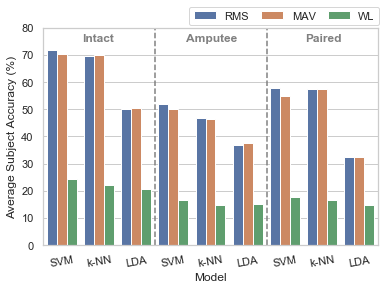

In [41]:
indPlot = sns.barplot(x = 'Model', y = 'Average Subject Accuracy (%)', hue = 'Feature', data=resultsdf)

indPlot.set_xticklabels(['SVM', 'k-NN', 'LDA']*3, rotation=10)
indPlot.set(ylim=(0,80))
indPlot.axvline(2.5, 0, 1, linestyle='--', color='gray')
indPlot.axvline(5.53, 0, 1, linestyle='--', color='gray')
indPlot.text(0.55,75,'Intact', color='Gray', fontweight='bold')
indPlot.text(3.35,75,'Amputee', color='Gray', fontweight='bold')
indPlot.text(6.55,75,'Paired', color='Gray', fontweight='bold')

indPlot.legend(bbox_to_anchor=(0.42, 1.02, .6, 0.102), loc=2, mode='expand', ncol=3)

In [28]:
#accWholeCol = test1WholeAccs + test1WholeAccsKNN + test1WholeAccsLDA + test2WholeAccs + test2WholeAccsKNN + test2WholeAccsLDA + test3WholeAccs + test3WholeAccsKNN + test3WholeAccsLDA 
accWholeCol =  [0.56, 0.51, 0.17005448709974375] + [0.6537643370736198, 0.660861344015127, 0.1537083571766228] + [0.29, 0.28, 0.15] + [0.3929776858282843, 0.34595537165656864, 0.11306055884617483] + [0.4519698537017881, 0.4507462686567164, 0.10314222144082645] + [0.17475395300724103, 0.1749135510565982, 0.10220858821318363] + test3WholeAccs +[0.5395381682512645, 0.5430599459913259, 0.1163641052563713] +  [0.20175967655411323, 0.1964012401991835, 0.11857152944716151]

resultsWholedf = pd.DataFrame()
resultsWholedf['Model'] = modelCol
resultsWholedf['Feature'] = featureCol
resultsWholedf['Accuracy (%)'] = accWholeCol
resultsWholedf['Accuracy (%)'] = resultsWholedf['Accuracy (%)']*100

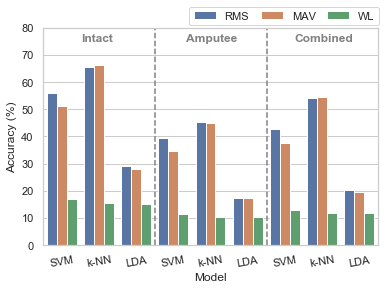

In [32]:
wholePlot = sns.barplot(x = 'Model', y = 'Accuracy (%)', hue = 'Feature', data=resultsWholedf)

wholePlot.set_xticklabels(['SVM', 'k-NN', 'LDA']*3, rotation=10)
wholePlot.set(ylim=(0,80))
wholePlot.axvline(2.5, 0, 1, linestyle='--', color='gray')
wholePlot.axvline(5.53, 0, 1, linestyle='--', color='gray')
wholePlot.text(0.53,75,'Intact', color='Gray', fontweight='bold')
wholePlot.text(3.35,75,'Amputee', color='Gray', fontweight='bold')
wholePlot.text(6.25,75,'Combined', color='Gray', fontweight='bold')

wholePlot.legend(bbox_to_anchor=(0.42, 1.02, .6, 0.102), loc=2, mode='expand', ncol=3)

In [75]:
accDB2Col = accWholeCol[0:9]
accDB3Col = accWholeCol[9:18]

modelScatterCol = (['SVM']*3) + (['k-NN']*3) + (['LDA']*3)
featureScatterCol = ['RMS', 'MAV', 'WL']*3

resultsScatterdf = pd.DataFrame()
resultsScatterdf['Model'] = modelScatterCol
resultsScatterdf['Feature'] = featureScatterCol
resultsScatterdf['Intact Accuracy (%)'] = accDB2Col
resultsScatterdf['Intact Accuracy (%)'] = resultsScatterdf['Intact Accuracy (%)']*100
resultsScatterdf['Amputee Accuracy (%)'] = accDB3Col
resultsScatterdf['Amputee Accuracy (%)'] = resultsScatterdf['Amputee Accuracy (%)']*100

(7.5, 50)

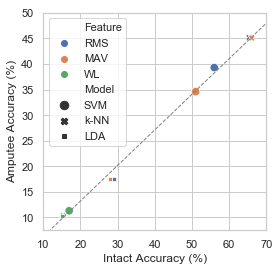

In [110]:
plt.figure(figsize=(4,4))
resultsScatter = sns.scatterplot(x='Intact Accuracy (%)', y='Amputee Accuracy (%)', hue="Feature", 
                                 style="Model", size="Model", data=resultsScatterdf)
resultsScatter.plot([8.230936819, 101.6302521], [5, 70], 'gray', linestyle='--', linewidth=1)
resultsScatter.set_xlim(10,70)
resultsScatter.set_ylim(7.5,50)


In [79]:
DB2Col = accCol[0:9]
DB3Col = accCol[9:18]

indScatterdf = pd.DataFrame()
indScatterdf['Model'] = modelScatterCol
indScatterdf['Feature'] = featureScatterCol
indScatterdf['Intact Accuracy (%)'] = DB2Col
indScatterdf['Intact Accuracy (%)'] = indScatterdf['Intact Accuracy (%)']*100
indScatterdf['Amputee Accuracy (%)'] = DB3Col
indScatterdf['Amputee Accuracy (%)'] = indScatterdf['Amputee Accuracy (%)']*100

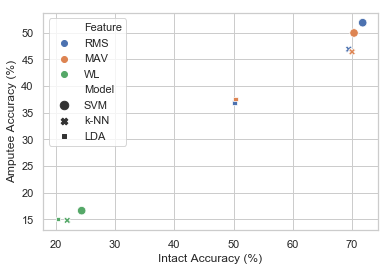

In [80]:
resultsScatter = sns.scatterplot(x='Intact Accuracy (%)', y='Amputee Accuracy (%)', hue="Feature", 
                                 style="Model", size="Model", data=indScatterdf)